# Matplotlib Workshop: Python plotting library

Please sign if you have already not done so and please ask a DSI member if you are having trouble with installing python, matplotlib, pandas, numpy, or downloading the workshop.

The workshop can be downloaded at the link: **PUT LINK OF GITHUB REPO**

## About DSI: 

We are an multi- and inter-disciplinary student organization that is dediated to promoting Data Science at the Univeristy of Florida. We are partnered with the UF Informatics Institute who's aim is to foster informatics research and education.  To learn more about DSI, please visit us on:
* **[Facebook](https://www.facebook.com/groups/DataSciUF/)**
* **[LinkedIn](https://www.linkedin.com/company/dsiufl/)**
* **[Github](https://github.com/dsiufl)**

## What is matplotlib?

Matplotlib is a python visualization library that is designed to be similiar to MATLAB sytnax and use numpy/pandas to create amazing 2D plots.  Visualizations are importants because they can allow you to identify trends, correlation, and patterns in the beginning stages of data exploration.  Additionally, they are a great way to present any knowledge you have uncovered after you have performed your data analysis. 

## Matplotlib coding examples:

>First we need to import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

>Import our data:

In [2]:
data = pd.read_csv('pokemon.csv')
data.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


>Now that we have imported out data, let's start making some plots!

### Box Plots:

>If we want to compare how an attribute differs between categories, a box plot is a good place to start.  It allows us to easily see any differences between the categories and see the summary statistics (variance, mean) of the attribute for each category.

>For example, say we want to compare the HP between water and fire types, a box plot would be a great visualization. 

In [3]:
boxplot_data = [data['HP'].loc[data['Type 1'] == 'Water'].values, data['HP'].loc[data['Type 1'] == 'Fire'].values]

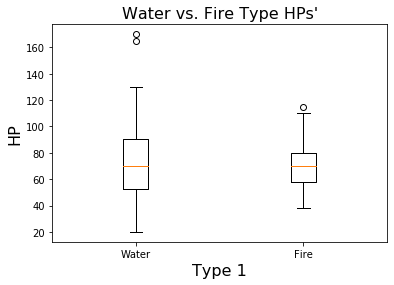

In [4]:
plt.boxplot(boxplot_data, labels=['Water','Fire'])
plt.title('Water vs. Fire Type HPs\'', fontsize=16)
plt.ylabel('HP', fontsize=16)
plt.xlabel('Type 1', fontsize=16)
plt.show()

>This is a basic box plot comparing water and fire type HPs', but what if you want to compare all types and make it more visually appealing?  Luckily, matplotlib has lots of options to change the appearance of the plot.  Below shows a more robust solution.

In [5]:
import matplotlib.cm as cm

In [6]:
typeLabels = data['Type 1'].unique().tolist()
colors = cm.rainbow(np.linspace(0,1,len(typeLabels)))
boxplot_data = []
for pokeType in typeLabels:
    boxplot_data.append(data['HP'].loc[data['Type 1'] == pokeType].values)

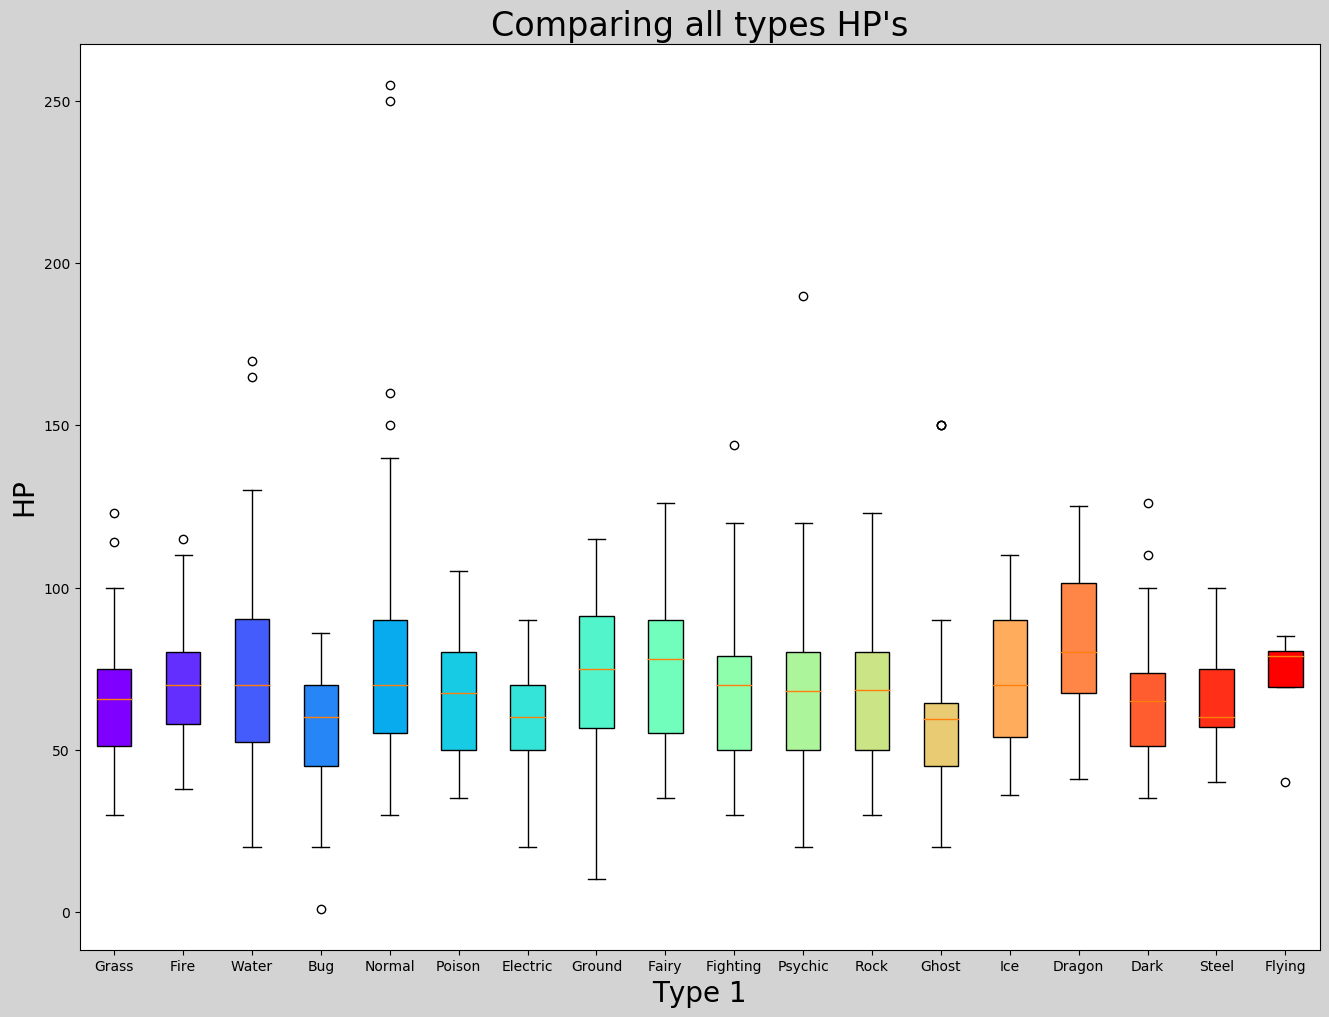

In [7]:
fig = plt.figure(figsize=(16,12),dpi=100, facecolor='lightgrey')
box = plt.boxplot(boxplot_data, labels = typeLabels, patch_artist=True)
plt.title('Comparing all types HP\'s', fontsize=24)
plt.ylabel('HP', fontsize=20)
plt.xlabel('Type 1', fontsize=20)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

>As you can see you can heavily customize matplotlib plots.  If you want to change something about your graph, most likely with some additional coding, you can make it appear exactly as you please. If you are making the graphs for yourself to perform exploratory data analysis, you probably don\'t need to do this much customization.  However, if you are making this to present to other, you may consider making it more appealing.

>If you want to save this plot to put in a powerpoint or slide deck, you can right click and save the image.

>For additional documentation on:
* **Matplotlib\'s boxplot** click [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
* **Pandas loc function** click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) 
* **Matplotlib colormaps** click [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

### Scatter Plots

>If we want to see the correlation between two different variables, scatter plots are a good way to visualize their relationship.  

>For example, if you want to see if there is a relationship between a pokemon\'s special attack and speed, a scatter plot would be a great visualization.

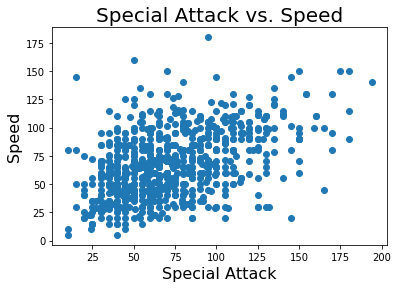

In [8]:
plt.scatter(data['Sp. Atk'], data['Speed'])
plt.xlabel('Special Attack', fontsize=16)
plt.ylabel('Speed',fontsize=16)
plt.title('Special Attack vs. Speed', fontsize=20)
plt.show()

>As you can see there is some positive correlation between a pokemon's speed and special attack.  But, what if you want to color the points based on type to see if some types have different trends?

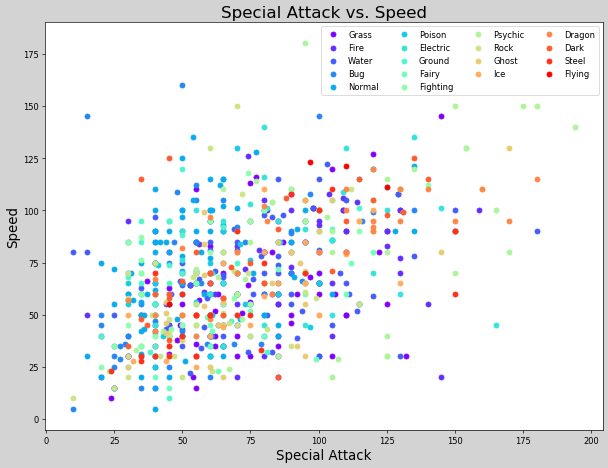

In [9]:
fig = plt.figure(figsize=(12,9),dpi=60, facecolor='lightgrey')
for pokeType, Index in zip(typeLabels, range(len(colors))):
    plt.scatter(data['Sp. Atk'].loc[data['Type 1'] == pokeType], data['Speed'].loc[data['Type 1'] == pokeType], 
                color=colors[Index], marker='o', label=pokeType)
plt.xlabel('Special Attack', fontsize=16)
plt.ylabel('Speed',fontsize=16)
plt.title('Special Attack vs. Speed', fontsize=20)
plt.legend(ncol=4)
plt.show()

>As you can see, there does not seem any clustering of a color on the graph, so no assertions can be made about pokemon type in relation to speed vs. special attack.

>For additional documentation on:
* **Matplotlib scatter plots** click [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)

### Line Plot

>If you want to draw the line of best fit onto your scatter plot or if you want to graph a function.  Line plots are the best option to use.

**The following code is about getting the line of best fit for speed vs special attack for all pokemon.  If you want to learn more about sklearn\'s linear regression click [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).**

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(data['Sp. Atk'].values.reshape(-1,1), data['Speed'].values.reshape(-1,1))
slope = model.coef_
intercept = model.intercept_
print(intercept, slope[0])

[37.68695741] [0.42008435]


>Now that we have the slope and intercept for our line of best fit, we can now graph it and see the trend of the data.

>np.linspace(a,b,n) gets n equally spaced points from a to b.  It is really useful for plotting functions becuase it can get a large collection of points so it looks like the space between the points are interpolated. More documentation on **np.linspace** is [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html).

In [12]:
x = np.linspace(0,200, 1000).reshape(-1,1)
y = intercept + slope*x

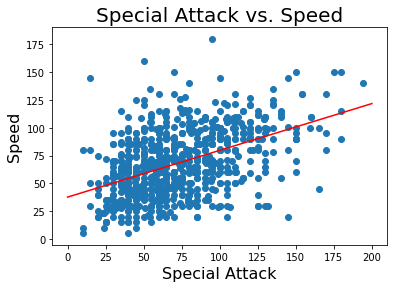

In [13]:
plt.plot(x,y, color='red')
plt.scatter(data['Sp. Atk'], data['Speed'])
plt.xlabel('Special Attack', fontsize=16)
plt.ylabel('Speed',fontsize=16)
plt.title('Special Attack vs. Speed', fontsize=20)
plt.show()

> You can also have multiple lines on the same graph.  This time we will plot this line of best fit for each pokemon type and see if there is any noticable differences.

In [14]:
bestFit_data = []
for pokeType in typeLabels:
    model = LinearRegression()
    model.fit(data['Sp. Atk'].loc[data['Type 1'] == pokeType].values.reshape(-1,1), 
              data['Speed'].loc[data['Type 1'] == pokeType].values.reshape(-1,1))
    slope = model.coef_
    intercept = model.intercept_
    bestFit_data.append([intercept[0], slope[0][0]])

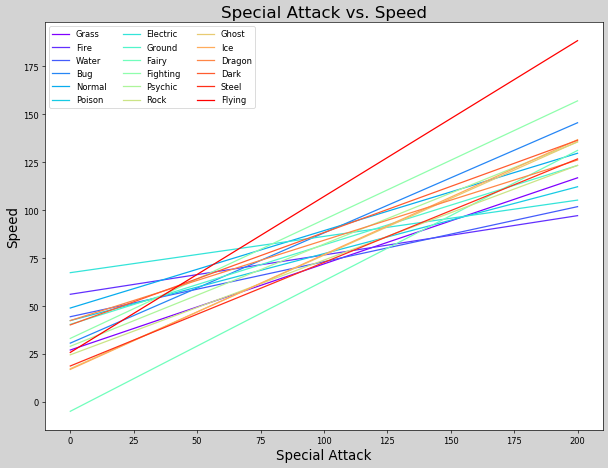

In [15]:
fig = plt.figure(figsize=(12,9),dpi=60, facecolor='lightgrey')
for i,c in zip(range(len(typeLabels)),range(len(colors))):
    x = np.linspace(0,200, 1000).reshape(-1,1)
    y = bestFit_data[i][0] + bestFit_data[i][1]*x
    plt.plot(x,y,color=colors[c], label=typeLabels[i])
plt.xlabel('Special Attack', fontsize=16)
plt.ylabel('Speed',fontsize=16)
plt.title('Special Attack vs. Speed', fontsize=20)
plt.legend(ncol=3)
plt.show()

>As you can see, depending on the pokemon type, the relation between a pokemon\'s speed and special attack changes.   

>For additional documentation on:
* **Matplotlib line plots** click [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

### Bar Plots

>Now if we wanted to see the distributon of a variable or if you wanted to compare the frequency of a attribute between categories, then a bar plot is used.

>Lets plot the distribution of types:

In [16]:
bar_data = []
for pokeType in typeLabels:
    bar_data.append(data['Type 1'].loc[data['Type 1'] == pokeType].count())

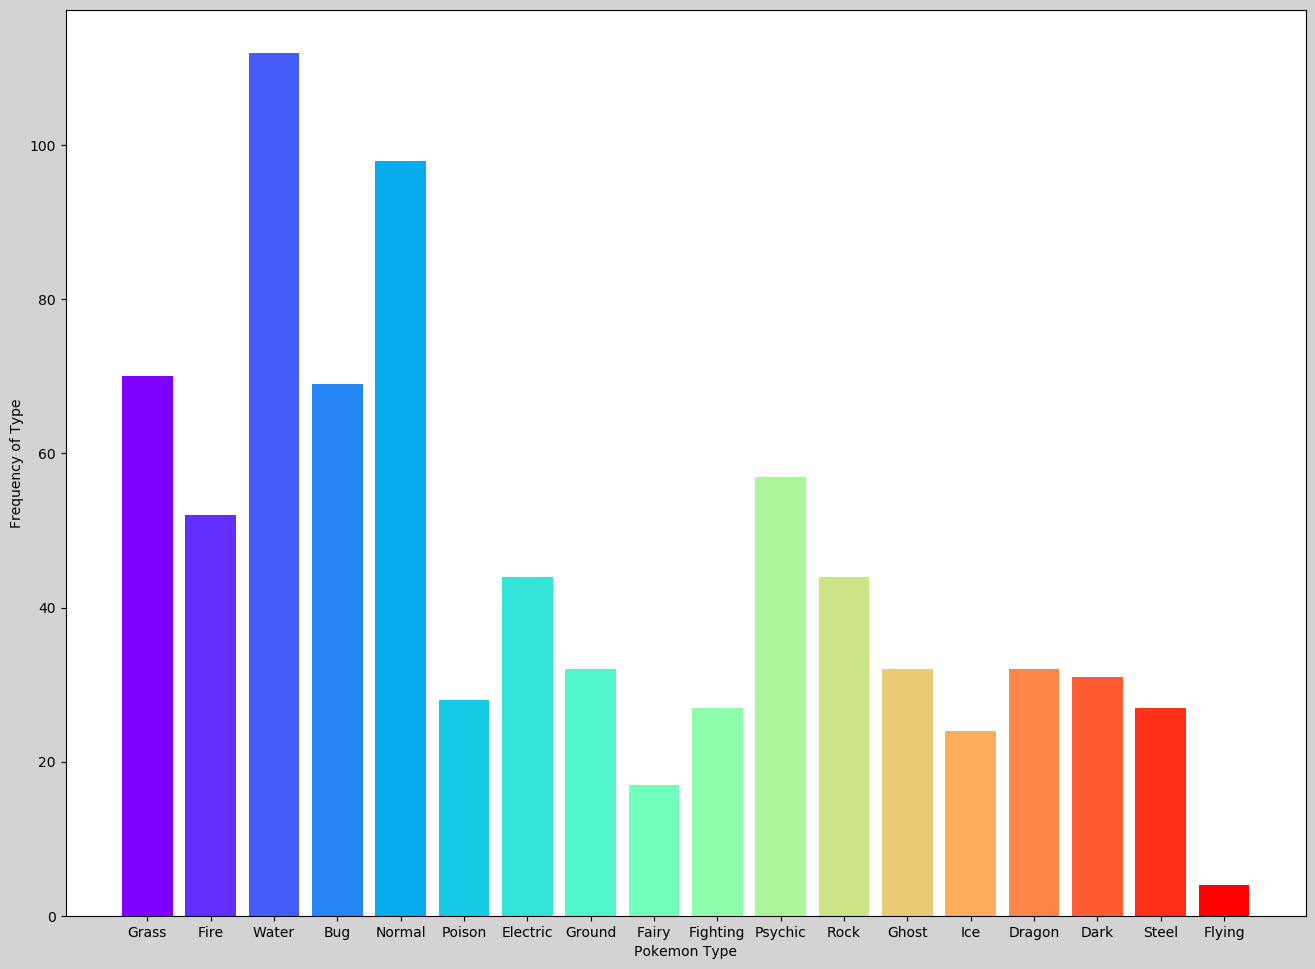

In [17]:
fig  = plt.figure(figsize=(16,12),dpi=100, facecolor='lightgrey')
plt.bar(typeLabels, bar_data, color=colors)
plt.xlabel('Pokemon Type')
plt.ylabel('Frequency of Type')
plt.show()

>What if you wanted to compare the frequnecy of a specific type based on if that type was its primary or secondary type?

In [18]:
bar_data2 = []
for pokeType in typeLabels:
    bar_data2.append(data['Type 2'].loc[data['Type 2'] == pokeType].count())

In [19]:
index = np.arange(len(typeLabels))
barWidth = 0.35

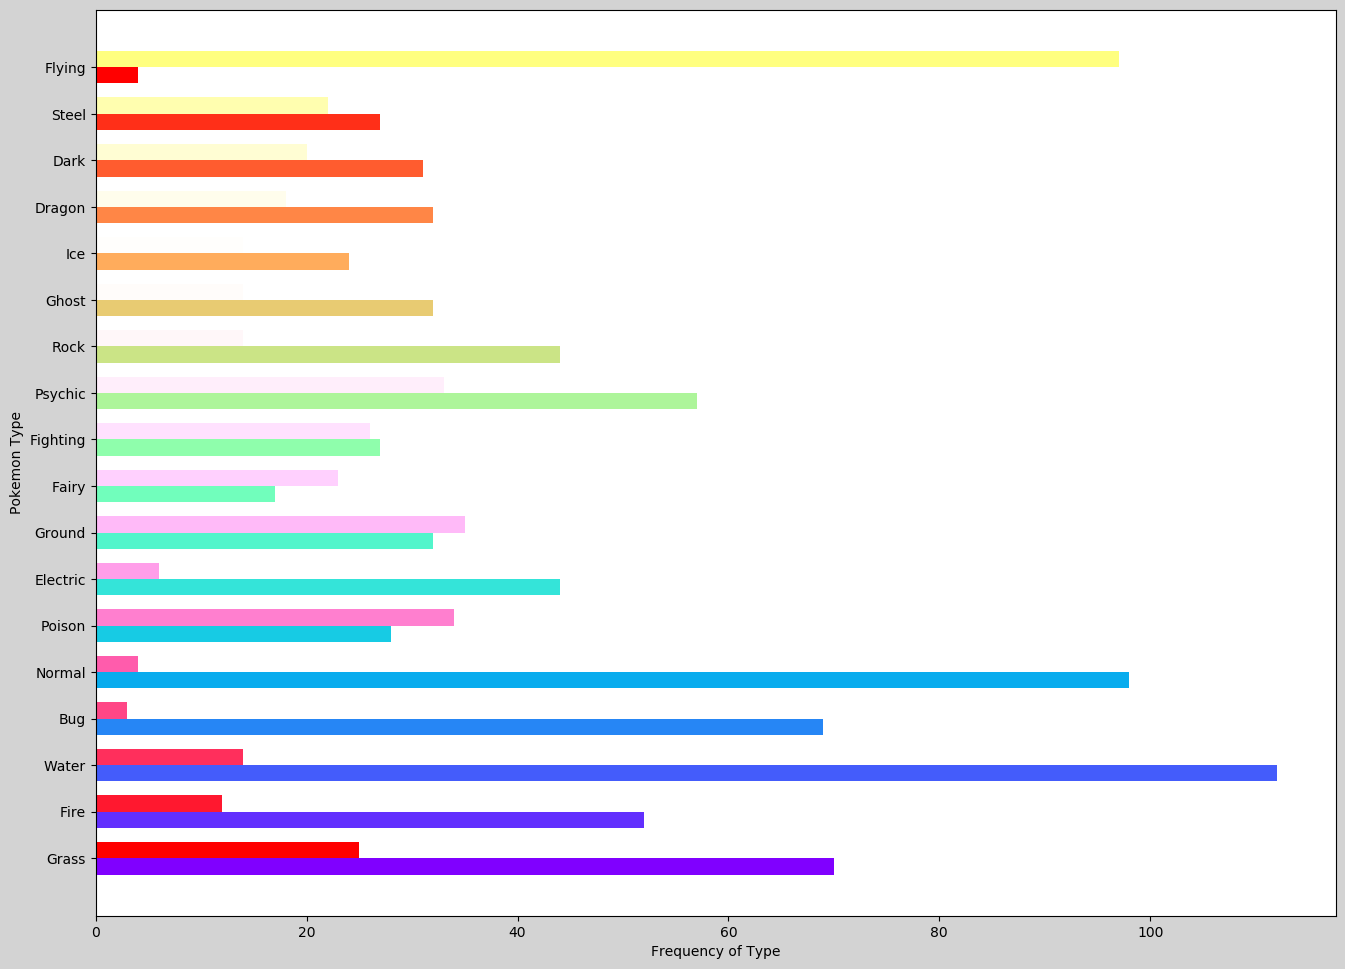

In [20]:
fig  = plt.figure(figsize=(16,12),dpi=100, facecolor='lightgrey')
plt.barh(index, bar_data, barWidth, color=colors)
plt.barh(index+barWidth, bar_data2, barWidth, color=np.flip(colors))
plt.ylabel('Pokemon Type')
plt.xlabel('Frequency of Type')
plt.yticks(index+barWidth/2, typeLabels)
plt.show()

For additional documentation on:
* **Matplotlib bar plots** click [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)

### Subplots

>If you want multiple plots in the same figure, you can use the subplots feature in matplotlib.  You can mix and match the different types of graphs and customize each plot indiviually like before.

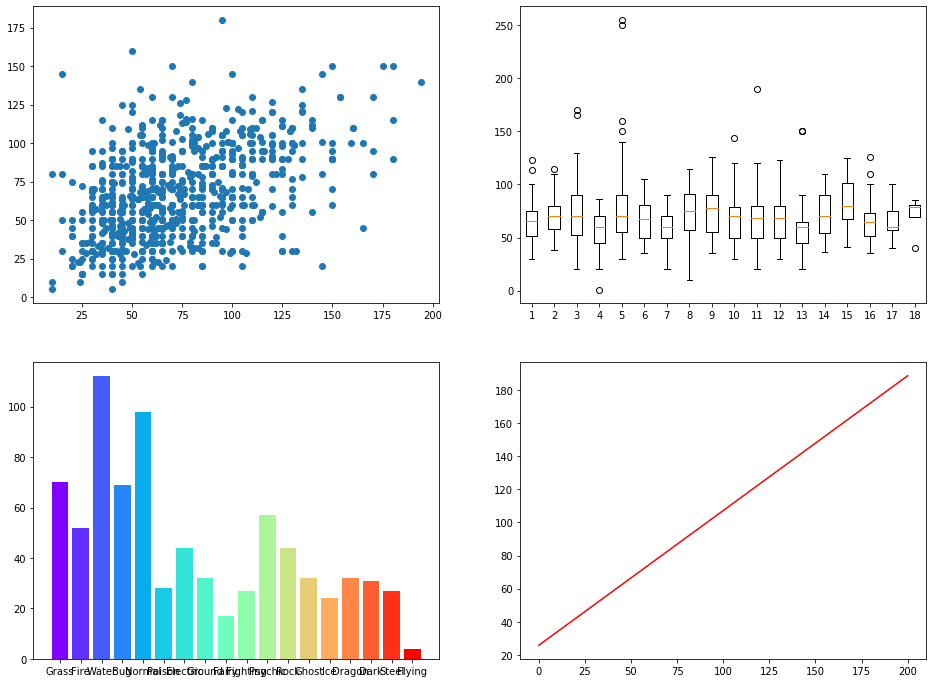

In [21]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(16,12))
ax[0,0].scatter(data['Sp. Atk'],data['Speed'])
ax[0,1].boxplot(boxplot_data)
ax[1,0].bar(typeLabels, bar_data, color=colors)
ax[1,1].plot(x,y, color='red')
plt.show()

>For more documentation on subplots:
* **Matplotlib subplots** click [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)

## Concluding remarks:

Today I showed you some of the basics features and plots of matplotlib.  Matplotlib is an extensive library with lots of functionality and lots of documentation.  If you want to try to plot something a specific way, then you can google it and probably find a solution online.  The official matplotlib website is [here](https://matplotlib.org/api/pyplot_summary.html).  I hope you enjoyed this DSI workshop and look forward to see everyone at future DSI events! 